In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_log_error

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv', index_col='id')
print('Rows:', df.shape[0], '\nColumns', df.shape[1])

Rows: 30471 
Columns 291


In [3]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
X_train = train.drop(['price_doc', 'timestamp'], axis=1)
y_train = train['price_doc']
X_test = test.drop(['price_doc', 'timestamp'], axis=1)
y_test = test['price_doc']

In [25]:
stat = pd.DataFrame({'mean' : [], 'std' : []})
for column in X_train:
    if X_train[column].dtype != object:
        stat.loc[column] = [np.mean(X_train[column]), np.std(X_train[column])]
#         print(column, np.mean(train[column]), np.std(train[column]))
stat

,mean,std
full_sq,54.393953,40.996836
life_sq,34.601619,57.482755
floor,7.694144,5.326814
max_floor,12.577685,6.828123
material,1.827161,1.480306
...,...,...
church_count_5000,30.306162,47.392137
mosque_count_5000,0.439408,0.607108
leisure_count_5000,8.672916,20.597291
sport_count_5000,52.873359,46.372764


In [91]:
column = 'build_year'

X_train[(X_train[column] < stat.loc[column].loc['mean'] - 7 * stat.loc[column].loc['std']) |
       (X_train[column] > stat.loc[column].loc['mean'] + 7 * stat.loc[column].loc['std'])]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
10092,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,33.0,Investment,...,107,46,8,2,10,31,2,7,91,11


In [62]:
stat.loc[column].loc['mean'], stat.loc[column].loc['std']

(54.393953068592054, 40.99683596452826)

In [65]:
X_train[column].max()

5326

In [103]:
st = X_train[:0]
for column in X_train:
    if X_train[column].dtype != object:
        st = X_train[(X_train[column] < stat.loc[column].loc['mean'] - 20 * stat.loc[column].loc['std']) |
                     (X_train[column] > stat.loc[column].loc['mean'] + 20 * stat.loc[column].loc['std'])]
#         if len(st) > 100:
#             break
        print(len(st), column)
st

1 full_sq
1 life_sq
0 floor
0 max_floor
0 material
1 build_year
0 num_room
4 kitch_sq
1 state
0 area_m
0 raion_popul
0 green_zone_part
0 indust_part
0 children_preschool
0 preschool_quota
0 preschool_education_centers_raion
0 children_school
0 school_quota
0 school_education_centers_raion
0 school_education_centers_top_20_raion
0 hospital_beds_raion
0 healthcare_centers_raion
0 university_top_20_raion
0 sport_objects_raion
0 additional_education_raion
0 culture_objects_top_25_raion
0 shopping_centers_raion
0 office_raion
0 full_all
0 male_f
0 female_f
0 young_all
0 young_male
0 young_female
0 work_all
0 work_male
0 work_female
0 ekder_all
0 ekder_male
0 ekder_female
0 0_6_all
0 0_6_male
0 0_6_female
0 7_14_all
0 7_14_male
0 7_14_female
0 0_17_all
0 0_17_male
0 0_17_female
0 16_29_all
0 16_29_male
0 16_29_female
0 0_13_all
0 0_13_male
0 0_13_female
0 raion_build_count_with_material_info
0 build_count_block
0 build_count_wood
0 build_count_frame
0 build_count_brick
0 build_count_monolith

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,


In [101]:
st = X_train[(X_train[column] < stat.loc[column].loc['mean'] - 50 * stat.loc[column].loc['std']) |
                     (X_train[column] > stat.loc[column].loc['mean'] + 50 * stat.loc[column].loc['std'])]
st

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,


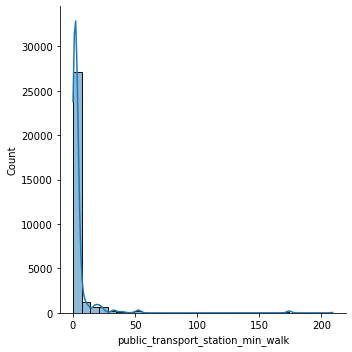

In [96]:
sns.displot(df['public_transport_station_min_walk'], bins=30, kde=True)

In [98]:
df['public_transport_station_min_walk'].mean(), df['public_transport_station_min_walk'].std()

(4.969626202181826, 15.2698608663129)

In [46]:
stat.loc['life_sq'].loc['mean']

34.60161926510276

In [31]:
st = df[:0]
st

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,


In [100]:
X_train

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
id,,,,,,,,,,,,,,,,,,,,,
12764,46,NaN,4.0,1.0,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,...,4,1,0,0,2,3,0,0,6,1
27374,134,NaN,2.0,2.0,5.0,NaN,3.0,1.0,1.0,OwnerOccupier,...,1,0,0,0,0,1,0,0,0,0
19865,44,28.0,6.0,9.0,1.0,1976.0,2.0,6.0,2.0,Investment,...,87,31,3,1,8,31,2,8,82,12
4160,59,38.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,16,6,1,0,6,14,0,0,33,5
2562,36,19.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,9,2,1,0,2,8,1,0,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29805,79,NaN,15.0,17.0,1.0,NaN,3.0,1.0,NaN,OwnerOccupier,...,5,1,1,0,2,12,0,1,11,1
5393,38,38.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,...,5,1,0,0,4,6,0,0,5,1
861,59,41.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,...,19,4,3,0,7,24,0,7,44,7
